# Info
Name:  

    KORUS_AOD_vs_Cirrus

Purpose:  

    Compare the flights AOD from 4STAR as compared to other values 
    Compare and filter out the cirrus optical depth retrieved
  
Input:

    none

Output:
   
    plots
  
Keywords:

    none
  
Dependencies:

    - numpy
    - matplotlib
    - scipy

  
Needed Files:

  - ...
    
History:

    Written: Samuel LeBlanc,Santa Cruz, CA, 2017-02-21
    

# Prepare the python environment


In [122]:
import numpy as np
import scipy.io as sio
import os
import matplotlib.pyplot as plt

In [123]:
import hdf5storage as hs

In [124]:
import Sp_parameters as Sp

In [125]:
%matplotlib notebook

In [126]:
import plotting_utils as pu

In [127]:
from load_utils import mat2py_time, toutc, load_ict
from Sp_parameters import smooth

In [128]:
fp ='C:/Users/sleblan2/Research/KORUS-AQ/'

In [129]:
vr = 'R0'

# Load the AOD files


## Load the AOD files from 4STAR

In [249]:
ar = hs.loadmat(fp+'/aod_ict/all_aod_KORUS_ict.mat')

In [250]:
ar.keys()

[u'AOD1040',
 u'AOD0532',
 u'UNCAOD0452',
 u'UNCAOD0550',
 u'AOD1020',
 u'AOD1627',
 u'AOD0606',
 u'UNCAOD0620',
 u'AOD1559',
 u'AOD1064',
 u'AOD0620',
 u'Latitude',
 u'AOD0550',
 u'AOD0452',
 u'fl_alt1',
 u'fl1',
 u'UNCAOD1236',
 u'fl2',
 u'UNCAOD0501',
 u'UNCAOD0606',
 u'qual_flag',
 u'UNCAOD0675',
 u'AOD0520',
 u'UNCAOD1559',
 u'AOD0501',
 u'Longitude',
 u'UNCAOD0380',
 u'fl',
 u'AOD0675',
 u'fl_QA',
 u'AOD1236',
 u'AOD0380',
 u'UNCAOD0865',
 u'Start_UTC',
 u'UNCAOD0781',
 u'days',
 u'UNCAOD0520',
 u'AOD0781',
 u'UNCAOD1064',
 u'fl_alt',
 u'AOD0865',
 u'amass_aer',
 u'UNCAOD1627',
 u'UNCAOD1020',
 u'UNCAOD0532',
 u'UNCAOD1040',
 u'GPS_Alt']

## Adjust the AOD to reflect dirt contamination

In [251]:
aod_names = sorted([a for a in ar.keys() if ('AOD' in a) and not ('UNC' in a)])

In [252]:
aod_names

[u'AOD0380',
 u'AOD0452',
 u'AOD0501',
 u'AOD0520',
 u'AOD0532',
 u'AOD0550',
 u'AOD0606',
 u'AOD0620',
 u'AOD0675',
 u'AOD0781',
 u'AOD0865',
 u'AOD1020',
 u'AOD1040',
 u'AOD1064',
 u'AOD1236',
 u'AOD1559',
 u'AOD1627']

In [253]:
arc = {}

In [254]:
for nn in aod_names:
    arc[nn] = ar[nn]-ar['UNC'+nn]
    arc[nn][ar['UNC'+nn]>0.02] = arc[nn][ar['UNC'+nn]>0.02]+0.02

In [255]:
arc.keys()

[u'AOD0520',
 u'AOD0532',
 u'AOD0620',
 u'AOD1559',
 u'AOD0380',
 u'AOD1020',
 u'AOD1236',
 u'AOD0501',
 u'AOD1064',
 u'AOD1040',
 u'AOD0781',
 u'AOD0606',
 u'AOD0865',
 u'AOD0550',
 u'AOD1627',
 u'AOD0675',
 u'AOD0452']

## Filter out bad data

In [256]:
ar['fl'][0]

False

In [257]:
ar['AOD0501'].shape

(583183L,)

## Make some filters for altitudes 

In [258]:
ar['fl_8'] = ar['GPS_Alt']>8000

In [259]:
ar['fl_2_8'] = (ar['GPS_Alt']<=8000) & (ar['GPS_Alt']>2000) & ar['fl_QA']

In [260]:
ar['fl_1.5_2'] = (ar['GPS_Alt']<=2000) & (ar['GPS_Alt']>1500) & ar['fl_QA']

In [261]:
ar['fl_1_1.5'] = (ar['GPS_Alt']<=1500) & (ar['GPS_Alt']>1000) & ar['fl_QA']

In [262]:
ar['fl_0.5_1'] = (ar['GPS_Alt']<=1000) & (ar['GPS_Alt']>500) & ar['fl_QA']

In [263]:
ar['fl_0.5'] = (ar['GPS_Alt']<=500) & ar['fl_QA']

In [265]:
ar['fl_1.0'] = (ar['GPS_Alt']<=1000) & ar['fl_QA']

# Plot out some AOD statistics

## Make some simple plots first

<IPython.core.display.Javascript object>


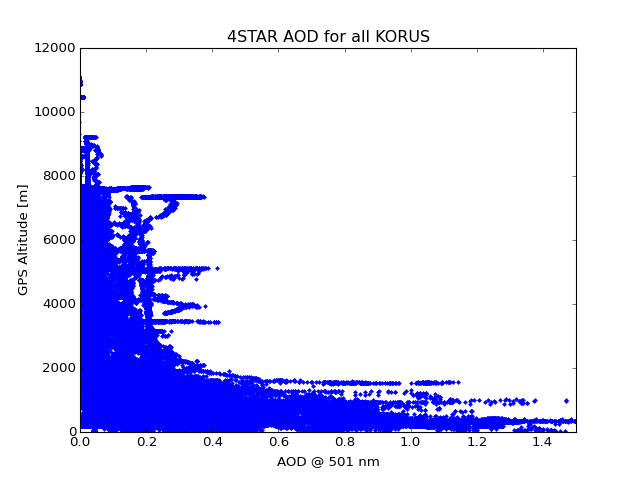

In [142]:
plt.figure()
plt.plot(arc['AOD0501'][ar['fl']],ar['GPS_Alt'][ar['fl']],'.')
plt.ylim([0,12000])
plt.xlim([0,1.5])
plt.title('4STAR AOD for all KORUS')
plt.xlabel('AOD @ 501 nm')
plt.ylabel('GPS Altitude [m]')

<IPython.core.display.Javascript object>


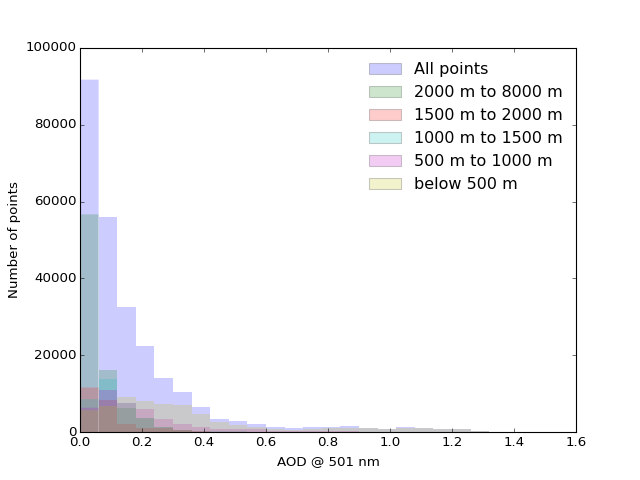

In [143]:
plt.figure()
plt.hist(arc['AOD0501'][ar['fl']],bins=25,range=(0,1.5),edgecolor='None',alpha=0.2,label='All points')
plt.hist(arc['AOD0501'][ar['fl_2_8']],bins=25,range=(0,1.5),edgecolor='None',alpha=0.2,label='2000 m to 8000 m')
plt.hist(arc['AOD0501'][ar['fl_1.5_2']],bins=25,range=(0,1.5),edgecolor='None',alpha=0.2,label='1500 m to 2000 m')
plt.hist(arc['AOD0501'][ar['fl_1_1.5']],bins=25,range=(0,1.5),edgecolor='None',alpha=0.2,label='1000 m to 1500 m')
plt.hist(arc['AOD0501'][ar['fl_0.5_1']],bins=25,range=(0,1.5),edgecolor='None',alpha=0.2,label='500 m to 1000 m')
plt.hist(arc['AOD0501'][ar['fl_0.5']],bins=25,range=(0,1.5),edgecolor='None',alpha=0.2,label='below 500 m')
plt.ylabel('Number of points')
plt.xlabel('AOD @ 501 nm')
plt.legend(frameon=False)

<IPython.core.display.Javascript object>


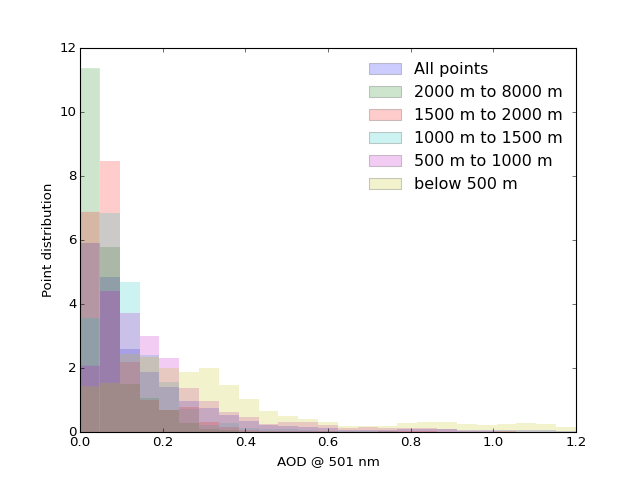

In [144]:
plt.figure()
plt.hist(arc['AOD0501'][ar['fl']],bins=25,range=(0,1.2),edgecolor='None',alpha=0.2,label='All points',normed=True)
plt.hist(arc['AOD0501'][ar['fl_2_8']],bins=25,range=(0,1.2),edgecolor='None',alpha=0.2,label='2000 m to 8000 m',normed=True)
plt.hist(arc['AOD0501'][ar['fl_1.5_2']],bins=25,range=(0,1.2),edgecolor='None',alpha=0.2,label='1500 m to 2000 m',normed=True)
plt.hist(arc['AOD0501'][ar['fl_1_1.5']],bins=25,range=(0,1.2),edgecolor='None',alpha=0.2,label='1000 m to 1500 m',normed=True)
plt.hist(arc['AOD0501'][ar['fl_0.5_1']],bins=25,range=(0,1.2),edgecolor='None',alpha=0.2,label='500 m to 1000 m',normed=True)
plt.hist(arc['AOD0501'][ar['fl_0.5']],bins=25,range=(0,1.2),edgecolor='None',alpha=0.2,label='below 500 m',normed=True)
plt.ylabel('Point distribution')
plt.xlabel('AOD @ 501 nm')
plt.legend(frameon=False)

In [109]:
n[-2][:-1]

array([ 0.  ,  0.06,  0.12,  0.18,  0.24,  0.3 ,  0.36,  0.42,  0.48,
        0.54,  0.6 ,  0.66,  0.72,  0.78,  0.84,  0.9 ,  0.96,  1.02,
        1.08,  1.14])

In [19]:
y=[(nn+n[-2][j+1])/2.0 for j,nn in enumerate(n[-2][:-1])]

NameError: name 'n' is not defined

In [20]:
n[1]

NameError: name 'n' is not defined

<IPython.core.display.Javascript object>


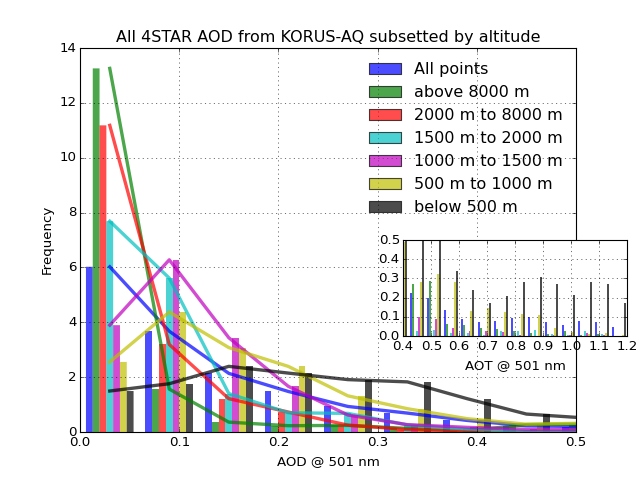

In [151]:
fig = plt.figure()
n=plt.hist([arc['AOD0501'][ar['fl']],
            arc['AOD0501'][ar['fl_8']],
          arc['AOD0501'][ar['fl_2_8']],
          arc['AOD0501'][ar['fl_1.5_2']],
          arc['AOD0501'][ar['fl_1_1.5']],
          arc['AOD0501'][ar['fl_0.5_1']],
          arc['AOD0501'][ar['fl_0.5']]
         ],bins=20,range=(0,1.2),normed=True,edgecolor='None',alpha=0.7,
         label=['All points','above 8000 m','2000 m to 8000 m','1500 m to 2000 m','1000 m to 1500 m','500 m to 1000 m','below 500 m'])
y = [(nn+n[1][j+1])/2.0 for j,nn in enumerate(n[1][:-1])]
for i,p in enumerate(n[-1]):
    plt.plot(y,n[0][i],'-',color=p[0].get_facecolor(),lw=3)
plt.legend(frameon=False)
plt.grid()
plt.xlim(0,0.5)
plt.xlabel('AOD @ 501 nm')
plt.ylabel('Frequency')
plt.title('All 4STAR AOD from KORUS-AQ subsetted by altitude')

left, bottom, width, height = [0.63, 0.3, 0.35, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])
n = ax2.hist([arc['AOD0501'][ar['fl']],
              arc['AOD0501'][ar['fl_8']],
          arc['AOD0501'][ar['fl_2_8']],
          arc['AOD0501'][ar['fl_1.5_2']],
          arc['AOD0501'][ar['fl_1_1.5']],
          arc['AOD0501'][ar['fl_0.5_1']],
          arc['AOD0501'][ar['fl_0.5']]
         ],bins=20,range=(0,1.2),normed=True,edgecolor='None',alpha=0.7)
ax2.set_xlim(0.4,1.2)
ax2.set_ylim(0,0.5)
ax2.grid()
ax2.set_xlabel('AOT @ 501 nm')

plt.savefig(fp+'plot/AOD_hist_alt_KORUS.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


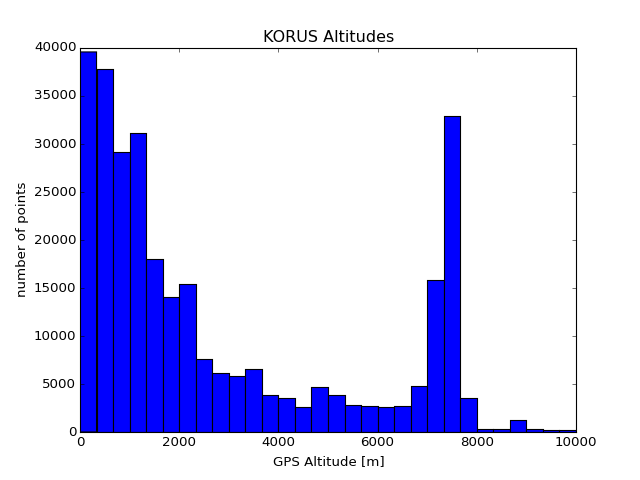

In [153]:
plt.figure()
n,bins,p = plt.hist(ar['GPS_Alt'][ar['fl']],bins=30,range=(0,10000))
plt.xlabel('GPS Altitude [m]')
plt.ylabel('number of points')
plt.title('KORUS Altitudes')

## Build vertical distribution of AOD

In [154]:
bins.shape

(31L,)

In [155]:
pos = np.array([(bins[i]+bins[i+1])/2.0 for i,b in enumerate(bins[:-1])])

In [156]:
len(pos)

30

<IPython.core.display.Javascript object>


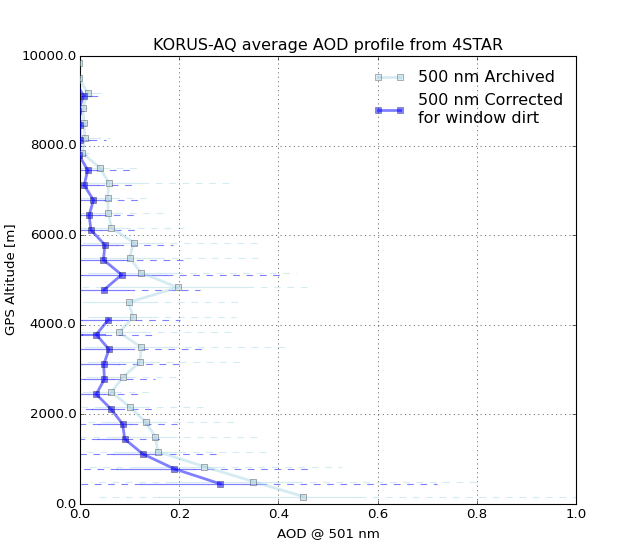

In [320]:
plt.figure(figsize=(8,7))
plt.plot(ar['AOD0501'][ar['fl']],ar['GPS_Alt'][ar['fl']],'.',alpha=0.0,color='w')
pu.make_boxplot(ar['AOD0501'][ar['fl']],ar['GPS_Alt'][ar['fl']],
                bins,pos,color='lightblue',alpha=0.5,y=0,vert=False,label='500 nm Archived',fliers_off=True)
pu.make_boxplot(arc['AOD0501'][ar['fl']],ar['GPS_Alt'][ar['fl']],
                bins,pos-50.0,color='blue',alpha=0.5,y=0,vert=False,label='500 nm Corrected\nfor window dirt',fliers_off=True)
plt.legend(frameon=False)
plt.xlim(0,1.0)
plt.ylim(0,10000)
plt.xlabel('AOD @ 501 nm')
plt.ylabel('GPS Altitude [m]')
plt.title('KORUS-AQ average AOD profile from 4STAR')
plt.grid()
plt.savefig(fp+'plot\\KORUS_AOD_profile_avg.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


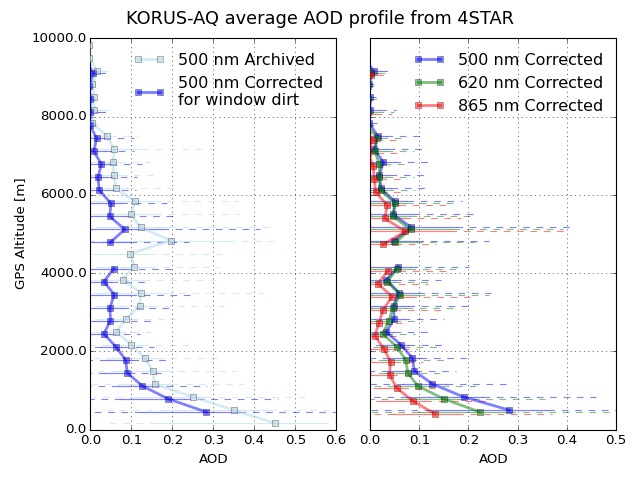

In [317]:
fig = plt.figure(figsize=(8,6))

ax = [0,0]
ax[0] = plt.subplot(121)
plt.suptitle('KORUS-AQ average AOD profile from 4STAR',size=16)
ax[0].plot(ar['AOD0501'][ar['fl']],ar['GPS_Alt'][ar['fl']],'.',alpha=0.0,color='w')
pu.make_boxplot(ar['AOD0501'][ar['fl']],ar['GPS_Alt'][ar['fl']],
                bins,pos,color='lightblue',alpha=0.5,y=0,vert=False,label='500 nm Archived',fliers_off=True)
pu.make_boxplot(arc['AOD0501'][ar['fl']],ar['GPS_Alt'][ar['fl']],
                bins,pos-50.0,color='blue',alpha=0.5,y=0,vert=False,label='500 nm Corrected\nfor window dirt',fliers_off=True)

ax[0].set_xlim(0,0.6)
ax[0].set_xlabel('AOD')
ax[0].set_ylabel('GPS Altitude [m]')

ax[0].legend(frameon=False)
ax[0].grid()
ax[0].set_ylim(0,10000.0)

ax[1] = plt.subplot(122,sharey=ax[0])
pu.make_boxplot(arc['AOD0501'][ar['fl']],ar['GPS_Alt'][ar['fl']],
                bins,pos,color='blue',alpha=0.5,y=0,vert=False,label='500 nm Corrected',fliers_off=True)
#ax[1].plot(ar['AOD0675'][ar['fl']],ar['GPS_Alt'][ar['fl']],'.',alpha=0.0,color='w')
#pu.make_boxplot(ar['AOD0620'][ar['fl']],ar['GPS_Alt'][ar['fl']]-100,
#                bins,pos,color='lightgreen',alpha=0.5,y=0,vert=False,label='620 nm',fliers_off=True)
pu.make_boxplot(arc['AOD0620'][ar['fl']],ar['GPS_Alt'][ar['fl']],
                bins,pos-50.0,color='green',alpha=0.5,y=0,vert=False,label='620 nm Corrected',fliers_off=True)
#ax[1].legend(frameon=False)
#ax[1].set_xlim(0,0.8)
#ax[1].set_xlabel('AOD @ 675 nm')

#pu.make_boxplot(ar['AOD0865'][ar['fl']],ar['GPS_Alt'][ar['fl']]-200,
#                bins,pos,color='lightcoral',alpha=0.5,y=0,vert=False,label='865 nm',fliers_off=True)
pu.make_boxplot(arc['AOD0865'][ar['fl']],ar['GPS_Alt'][ar['fl']],
                bins,pos-100.0,color='red',alpha=0.5,y=0,vert=False,label='865 nm Corrected',fliers_off=True)
ax[1].legend(frameon=False)
ax[1].grid()
ax[1].set_ylim(0,10000.0)
ax[1].set_xlim(0,0.5)
ax[1].set_xlabel('AOD')
plt.setp(ax[1].get_yticklabels(), visible=False)

plt.tight_layout()
plt.subplots_adjust(top=0.92)

plt.savefig(fp+'plot\\KORUS_AOD_profile_wvl_avg.png',transparent=True,dpi=600)

# Load the cloud files

In [72]:
fp

'C:/Users/sleblan2/Research/KORUS-AQ/'

In [73]:
fpdat = fp+'data_zen//'

In [74]:
dds = ['20160501','20160504','20160505','20160510','20160511','20160514',
       '20160515','20160519','20160521','20160524','20160526','20160602','20160604','20160609']

In [76]:
dds = ['20160502']

## Load the retrieval results and the spectra

In [77]:
rts = []
sps = []

In [79]:
for daystr in dds:
    print daystr
    rt = hs.loadmat(fpdat+'{}_zen_cld_retrieved.mat'.format(daystr))
    s = sio.loadmat(fpdat+'4STAR_{}starzen.mat'.format(daystr))
    sp = Sp.Sp(s)
    rts.append(rt)
    sps.append(sp)

20160502
1556 1556
in rads
(7807L, 1556L) 2 1556
1 in ui
(7807L, 1556L)
Calculating the utc times
No indexed good values, choosing all times that are greater than 0


## Run through some filters

### Filter where vis and nir don't match

In [80]:
i_vis = [1061,1062,1064]
i_nir = [1060,1063]

In [81]:
for i,daystr in enumerate(dds):
    nvis = np.nanmean(sps[i].norm[:,i_vis],axis=1)
    nnir = np.nanmean(sps[i].norm[:,i_nir],axis=1)
    rts[i]['delta'] = abs(nvis-nnir)
    rts[i]['fl_match'] = rts[i]['delta']<0.06
    print daystr,rts[i]['delta'].shape,rts[i]['delta'][rts[i]['fl_match']].shape,\
        float(rts[i]['delta'][rts[i]['fl_match']].shape[0])/ float(rts[i]['delta'].shape[0])*100.0

20160502 (7807L,) (5938L,) 76.0599462021


### Now filter out the times which were at too low altitude

In [331]:
zalt = 3000.0

In [332]:
fl_alt = rt['alt']>zalt

In [333]:
for i,daystr in enumerate(dds):
    rts[i]['fl_alt'] = rts[i]['alt'][:,0]>zalt
    print daystr,rts[i]['utc'].shape,rts[i]['utc'][rts[i]['fl_alt']].shape,\
        float(rts[i]['utc'][rts[i]['fl_alt']].shape[0])/ float(rts[i]['utc'].shape[0])*100.0

20160502 (7807L,) (979L,) 12.5400281798


### Filter for high ki squared residuals

In [334]:
for i,daystr in enumerate(dds):
    rts[i]['fl_ki'] = rts[i]['ki']<0.6
    print daystr,rts[i]['utc'].shape,rts[i]['utc'][rts[i]['fl_ki']].shape,\
        float(rts[i]['utc'][rts[i]['fl_ki']].shape[0])/ float(rts[i]['utc'].shape[0])*100.0

20160502 (7807L,) (5686L,) 72.8320737799


### Combine the filters

In [335]:
tot=0
tot_fl=0
for i,daystr in enumerate(dds):
    rts[i]['fl'] = rts[i]['fl_match'] & rts[i]['fl_alt'] & rts[i]['fl_ki']
    print daystr,rts[i]['utc'].shape,rts[i]['utc'][rts[i]['fl']].shape,\
        float(rts[i]['utc'][rts[i]['fl']].shape[0])/ float(rts[i]['utc'].shape[0])*100.0 
    tot = tot+len(rts[i]['utc'])
    tot_fl = tot_fl+len(rts[i]['utc'][rts[i]['fl']])

20160502 (7807L,) (662L,) 8.47956961701


In [336]:
print tot, tot_fl, float(tot_fl)/float(tot)*100.0

7807 662 8.47956961701


# Plot and save the Cloud results

## Run through and plot the results

<IPython.core.display.Javascript object>


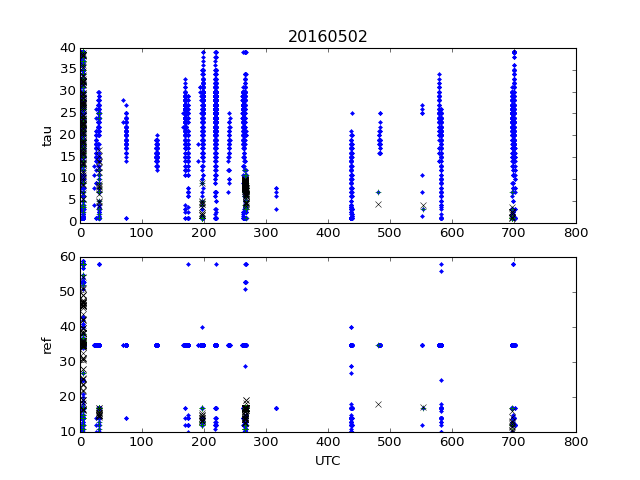

In [225]:
for i,daystr in enumerate(dds):
    plt.figure()
    ax1 = plt.subplot(211)
    ax2 = plt.subplot(212,sharex=ax1)
    ax1.plot(rts[i]['utc'],rts[i]['tau'],'b.')
    ax1.plot(rts[i]['utc'][rts[i]['fl']],rts[i]['tau'][rts[i]['fl']],'g+')
    try:
        ax1.plot(rts[i]['utc'][rts[i]['fl']],smooth(rts[i]['tau'][rts[i]['fl']],6),'kx')
    except:
        pass
    ax1.set_ylabel('tau')
    
    ax2.plot(rts[i]['utc'],rts[i]['ref'],'b.')
    ax2.plot(rts[i]['utc'][rts[i]['fl']],rts[i]['ref'][rts[i]['fl']],'g+')
    try:
        ax2.plot(rts[i]['utc'][rts[i]['fl']],smooth(rts[i]['ref'][rts[i]['fl']],6),'kx')
    except:
        pass
    ax2.set_ylabel('ref')
    ax2.set_xlabel('UTC')
    ax1.set_title(daystr)

In [341]:
for i,daystr in enumerate(dds):
    try:
        rts[i]['tau_fl'] = smooth(rts[i]['tau'][rts[i]['fl']],6)
        rts[i]['ref_fl'] = smooth(rts[i]['ref'][rts[i]['fl']],6)
    except:
        print 'except',i
        rts[i]['tau_fl'] = rts[i]['tau'][rts[i]['fl']]
        rts[i]['ref_fl'] = rts[i]['ref'][rts[i]['fl']]
    rts[i]['lat_fl'] = rts[i]['lat'][rts[i]['fl']]
    rts[i]['lon_fl'] = rts[i]['lon'][rts[i]['fl']]
    rts[i]['alt_fl'] = rts[i]['alt'][rts[i]['fl']]
    rts[i]['utc_fl'] = rts[i]['utc'][rts[i]['fl']]

## Write the results to ict

In [89]:
import write_utils as wu

In [90]:
hdict = {'PI':'Jens Redemann',
     'Institution':'NASA Ames Research Center',
     'Instrument':'Spectrometers for Sky-Scanning, Sun-Tracking Atmospheric Research (4STAR)',
     'campaign':'KORUS-AQ 2016',
     'special_comments':'Retrieved cloud properties',
     'PI_contact':'Jens.Redemann-1@nasa.gov',
     'platform':'NASA DC8',
     'location':'based out of Osan Air Base, South Korea, actual location of measurement included in file',
     'instrument_info':'Derived product from 4STAR zenith measurements',
     'data_info':\
'Using the cloud property retrieval method based on spectral transmitted light measurements described by LeBlanc, Pileskie, Schmidt, and Coddington (2015), AMT',
     'uncertainty':'Undefined in preliminary archival',
     'DM_contact':'Samuel LeBlanc, samuel.leblanc@nasa.gov',
     'project_info':'KORUS-AQ 2016 deployment; Mai-June 2016; South Korea',
     'stipulations':'Use of these data requires PRIOR OK from the PI; this is preliminary data',
     'rev_comments':\
"""RA: Preliminary archival of cloud properties retrieived from 4STAR sky radiance measurements. 
Final radiance calibration not yet applied. Filtered out in-cloud data, bad measurements, and high clouds. 
Data is subject to uncertainties linked to detector stability, transfer efficiency of light through fiber optic cable, and deposition on the instrument window."""
    }
order = ['LAT','LON','COD','REF']

In [91]:
for i,daystr in enumerate(dds):
    d_dict = {'Start_UTC':{'data':rts[i]['utc'][rts[i]['fl']]*3600.0,
                           'unit':'seconds from midnight UTC','long_description':'time keeping'},
              'utc':{'data':rts[i]['utc'][rts[i]['fl']],
                     'unit':'seconds from midnight UTC','long_description':'time keeping'},
          'COD':{'data':rts[i]['tau_fl'],
                 'unit':'None','long_description':'Cloud Optical Depth of overlying cloud'},
          'REF':{'data':rts[i]['ref_fl'],
                 'unit':'micrometer','long_description':'Cloud drop effective radius for liquid clouds'},
          'LAT':{'data':rts[i]['lat'][rts[i]['fl']],
                 'unit':'Degrees','long_description':'Latitude of measurement, negative for Southern hemisphere'},
          'LON':{'data':rts[i]['lon'][rts[i]['fl']],
                 'unit':'Degrees','long_description':'Longitude of measurement, East is positive, from -180 to 180'}
          }
    try:
        d_dict_out = wu.prep_data_for_ict(d_dict,in_var_name='utc',out_var_name='Start_UTC', in_input=True,time_interval=1.0)

        wu.write_ict(hdict,d_dict_out,filepath=fp+'zen_ict/v2/',
                  data_id='4STAR_CLD',loc_id='DC8',date=daystr,rev='RA',order=order)    
    except:
        print 'failed on ',daystr

LAT
LON
COD
REF
File writing successful to: C:/Users/sleblan2/Research/KORUS-AQ/zen_ict/v2/4STAR-CLD_DC8_20160502_RA.ict


## Save to mat

In [227]:
rtss = {str(i):rr for i,rr in enumerate(rts)}

In [228]:
def dict_keys_to_unicode(d):
    out = dict()
    for k, v in d.items():
        out[k.decode()] = v
    return out

for n in rtss.keys():
    if type(rtss[n]) is list:
        print n
        for i,t in enumerate(rtss[n]):
            rtss[n][i] = dict_keys_to_unicode(t)
    else:
        print 'no',n
        rtss[n] = dict_keys_to_unicode(rtss[n])


no 0


In [94]:
hs.savemat(fp+'zen_ict/v2/{}_all_retrieved.mat'.format(vr),rtss)

# Make Cloud plots

## Read in the filtered cloud retrievals

In [95]:
from load_utils import load_ict

In [96]:
out_RA = []
out_head_RA = []
for d in dds:
    try:
        fname_aod = fp+'zen_ict/v2/4STAR-CLD_DC8_{}_{vr}.ict'.format(d,vr=vr)
        tt,th = load_ict(fname_aod,return_header=True)
        out_RA.append(tt)
        out_head_RA.append(th)
    except:
        print 'problem with', d

problem with 20160502


In [97]:
out_head_RA[0]

IndexError: list index out of range

## Combine to single array

In [338]:
cr = {}
for n in rts[0].keys():
    cr[n] = np.array([])

In [339]:
cr['days'] = np.array([])

In [340]:
for i,d in enumerate(dds):
    cr['days'] = np.append(cr['days'],np.zeros_like(rts[i]['utc'])+i)
    for n in rts[0].keys():
        cr[n] = np.append(cr[n],rts[i][n])

## Plot the data on a map

In [232]:
import plotting_utils as pu
from map_interactive import build_basemap

In [233]:
rts[i]['tau_fl']

array([ 38.33333333,  38.33333333,  38.5       ,  38.83333333,
        38.5       ,  38.16666667,  36.16666667,  35.66666667,
        33.83333333,  31.83333333,  32.16666667,  32.5       ,
        32.5       ,  32.33333333,  31.5       ,  32.16666667,
        29.33333333,  28.5       ,  27.83333333,  27.        ,
        26.66666667,  24.66666667,  26.16666667,  24.33333333,
        25.83333333,  27.16666667,  27.66666667,  28.5       ,
        27.33333333,  27.16666667,  27.16666667,  24.        ,
        26.16666667,  27.83333333,  29.66666667,  32.16666667,
        32.33333333,  33.5       ,  32.83333333,  29.66666667,
        29.5       ,  28.66666667,  23.75      ,  20.58333333,
        15.91666667,  13.83333333,   9.83333333,   5.33333333,
         5.33333333,   6.66666667,   8.5       ,  10.25      ,
        11.25      ,  13.58333333,  15.83333333,  18.5       ,
        18.33333333,  18.16666667,  16.25      ,  15.75      ,
        15.58333333,  13.41666667,  13.08333333,  13.75

In [234]:
for i,daystr in enumerate(dds):
    print rts[i]['lat'][rts[i]['fl']][:,0].shape,rts[i]['lon'][rts[i]['fl']][:,0].shape,rts[i]['tau_fl'].shape

(318L,) (318L,) (318L,)


<IPython.core.display.Javascript object>


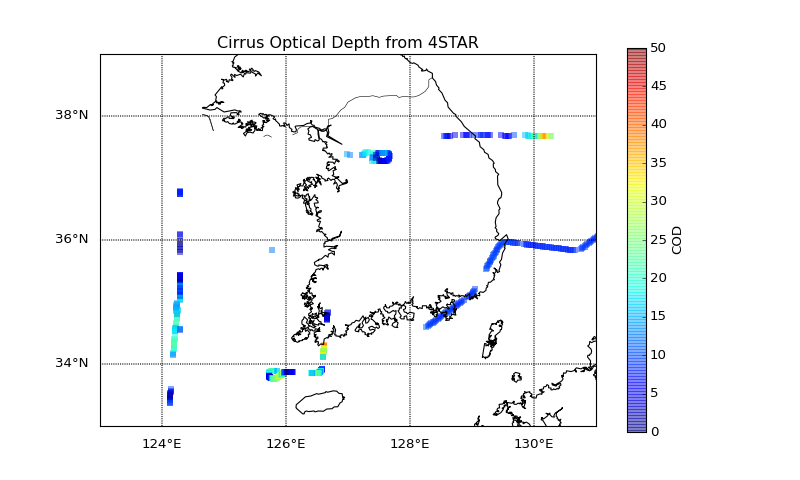

In [354]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
m = build_basemap(lower_left=[123,33],upper_right=[131,39],ax=ax,larger=False)
sa = []
for i,daystr in enumerate(dds):
    x,y = m(rts[i]['lon'][rts[i]['fl']][:,0]+i*0.03,rts[i]['lat'][rts[i]['fl']][:,0])
    sca = ax.scatter(x,y,c=rts[i]['tau_fl'],
              s=30,marker='s',alpha=0.5,vmin=0.0,vmax=50.0,edgecolor='None')
    sa.append(sca)
#pu.prelim()
plt.title('Cirrus Optical Depth from 4STAR')
cb = plt.colorbar(sa[0])
cb.set_label('COD')
plt.savefig(fp+'plot/KORUS_COD_map.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


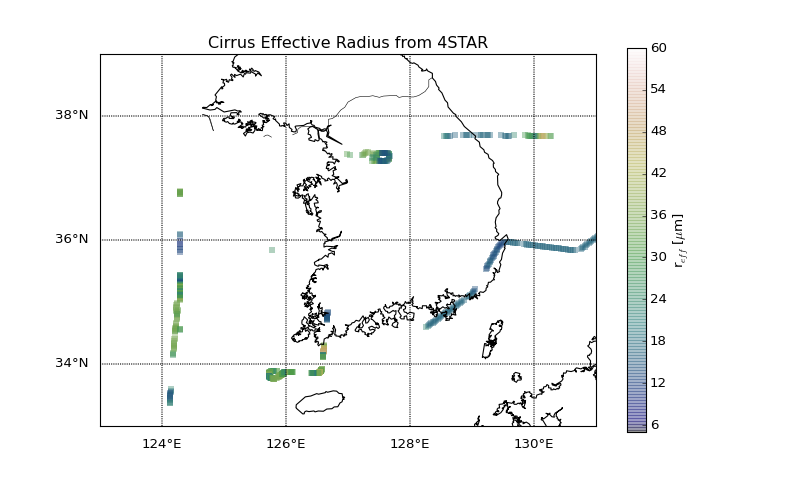

In [355]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
m = build_basemap(lower_left=[123,33],upper_right=[131,39],ax=ax,larger=False)
sa = []
for i,daystr in enumerate(dds):
    x,y = m(rts[i]['lon'][rts[i]['fl']][:,0]+i*0.03,rts[i]['lat'][rts[i]['fl']][:,0])
    sca = ax.scatter(x,y,c=rts[i]['ref_fl'],
              s=30,marker='s',alpha=0.4,vmin=5.0,vmax=60.0,edgecolor='None',cmap=plt.cm.gist_earth)
    sa.append(sca)
#pu.prelim()
plt.title('Cirrus Effective Radius from 4STAR')
cb = plt.colorbar(sa[0])
cb.set_label('r$_{{eff}}$ [$\\mu$m]')
plt.savefig(fp+'plot/KORUS_REF_map.png',transparent=True,dpi=600)

## Plot out some statistics

<IPython.core.display.Javascript object>


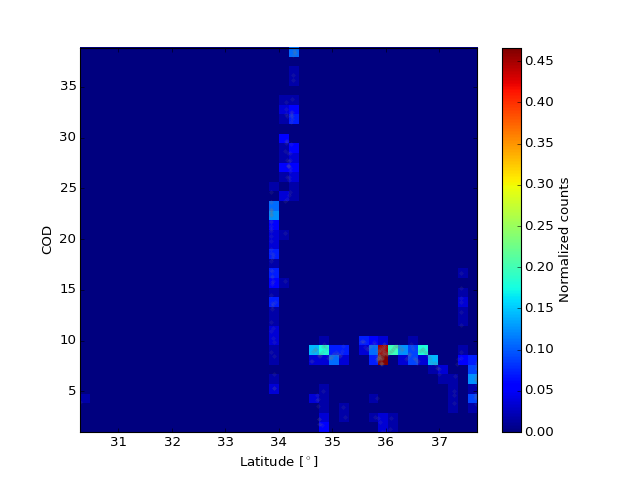

In [247]:
plt.figure()
plt.plot(cr['lat_fl'],cr['tau_fl'],'.',color='grey',alpha=0.1)
plt.hist2d(cr['lat_fl'],cr['tau_fl'],bins=40,normed=True)
plt.xlabel('Latitude [$^\\circ$]')
plt.ylabel('COD')
cb = plt.colorbar()
cb.set_label('Normalized counts')
#plt.title('4STAR Cloud optical depth for all ORACLES flights')
#plt.savefig(fp+'..//zen_ict/v3/COD_hist_lat.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


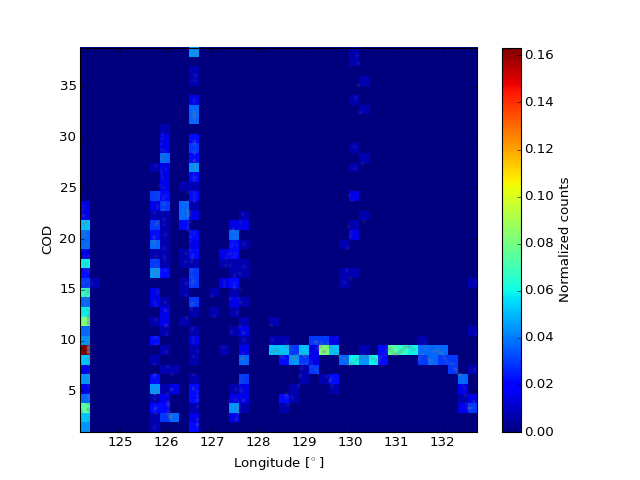

In [114]:
plt.figure()
plt.plot(cr['lon_fl'],cr['tau_fl'],'.',color='grey',alpha=0.1)
plt.hist2d(cr['lon_fl'],cr['tau_fl'],bins=40,normed=True)
plt.xlabel('Longitude [$^\\circ$]')
plt.ylabel('COD')
cb = plt.colorbar()
cb.set_label('Normalized counts')
#plt.title('4STAR Cloud optical depth for all ORACLES flights')
#plt.savefig(fp+'..//zen_ict/v3/COD_hist_lon.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


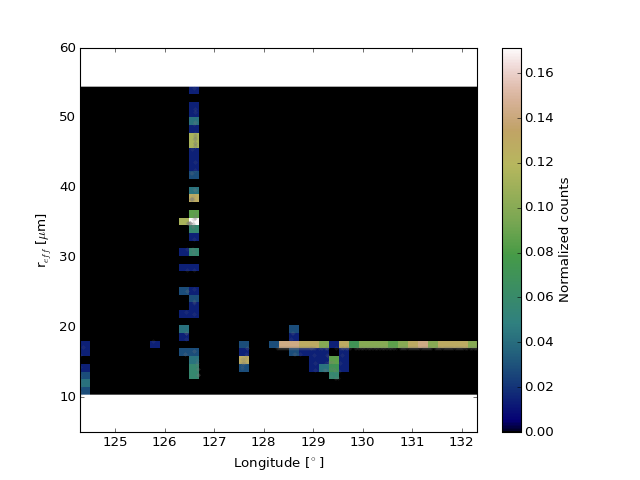

In [248]:
plt.figure()
plt.plot(cr['lon_fl'],cr['ref_fl'],'.',color='grey',alpha=0.1)
plt.hist2d(cr['lon_fl'],cr['ref_fl'],bins=40,normed=True,cmap=plt.cm.gist_earth)
plt.xlabel('Longitude [$^\\circ$]')
plt.ylabel('r$_{{eff}}$ [$\\mu$m]')
plt.ylim(5,60)
cb = plt.colorbar()
cb.set_label('Normalized counts')
#plt.title('4STAR Effective Radius for all ORACLES flights')
#plt.savefig(fp+'..//zen_ict/v3/ref_hist_lon.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


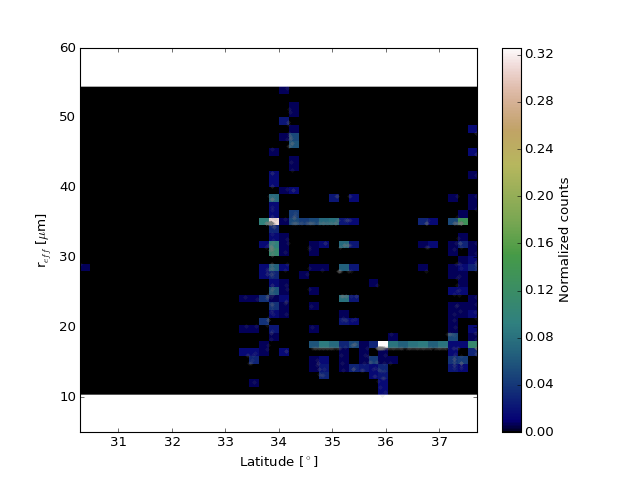

In [117]:
plt.figure()
plt.plot(cr['lat_fl'],cr['ref_fl'],'.',color='grey',alpha=0.1)
plt.hist2d(cr['lat_fl'],cr['ref_fl'],bins=40,normed=True,cmap=plt.cm.gist_earth)
plt.ylim(5,60)
plt.xlabel('Latitude [$^\\circ$]')
plt.ylabel('r$_{{eff}}$ [$\\mu$m]')
cb = plt.colorbar()
cb.set_label('Normalized counts')
#plt.title('4STAR Effective Radius for all ORACLES flights')
#plt.savefig(fp+'..//zen_ict/v3/ref_hist_lat.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


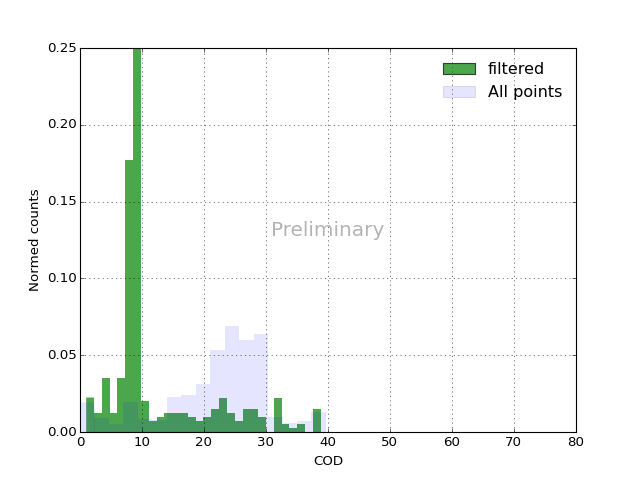

In [237]:
fig = plt.figure()
plt.hist(cr['tau_fl'],bins=30,edgecolor='None',color='g',alpha=0.7,normed=True,label='filtered')
plt.hist(cr['tau'],bins=30,edgecolor='None',color='b',alpha=0.1,normed=True,range=(0,70),label='All points')
plt.ylabel('Normed counts')
plt.xlabel('COD')
plt.grid()
pu.prelim()
plt.legend(frameon=False)
#plt.savefig(fp+'..//zen_ict/v3/cod_hist.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


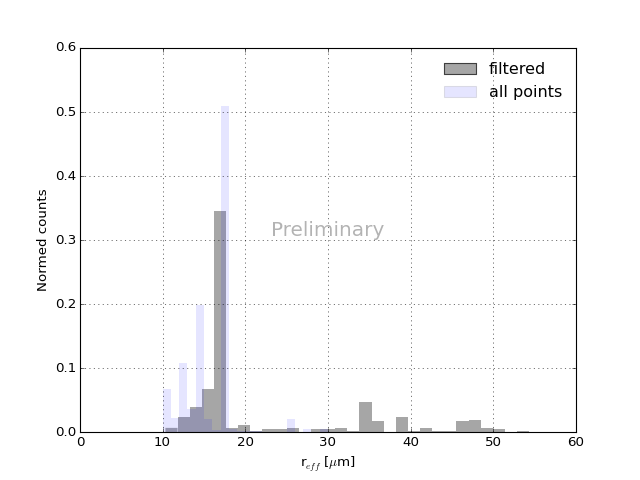

In [238]:
fig = plt.figure()
plt.hist(cr['ref_fl'],bins=30,edgecolor='None',color='grey',alpha=0.7,normed=True,label='filtered')
plt.hist(cr['ref'],bins=30,edgecolor='None',color='b',alpha=0.1,normed=True,range=(0,30),label='all points')
plt.ylabel('Normed counts')
plt.xlabel('r$_{{eff}}$ [$\\mu$m]')
plt.grid()
pu.prelim()
plt.legend(frameon=False)
#plt.savefig(fp+'..//zen_ict/v3/ref_hist.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


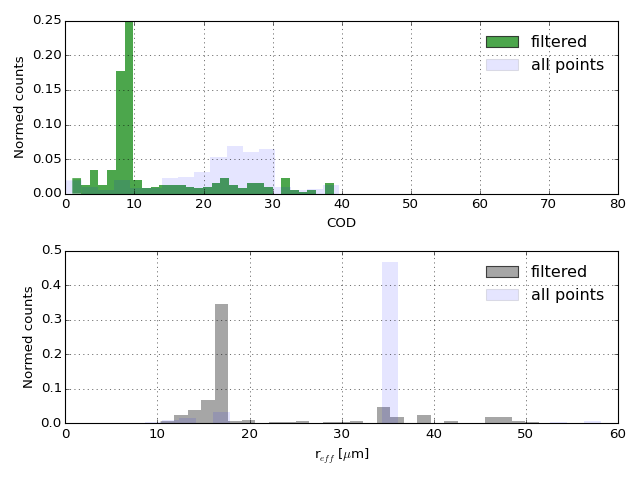

In [240]:
fig,ax = plt.subplots(2,1)
ax = ax.ravel()
ax[0].hist(cr['tau_fl'],bins=30,edgecolor='None',color='g',alpha=0.7,normed=True,label='filtered')
ax[0].hist(cr['tau'],bins=30,edgecolor='None',color='b',alpha=0.1,normed=True,range=(0,70),label='all points')
ax[0].set_ylabel('Normed counts')
ax[0].set_xlabel('COD')
ax[0].grid()
#pu.prelim(ax=ax[0])
ax[0].legend(frameon=False)

ax[1].hist(cr['ref_fl'],bins=30,edgecolor='None',color='grey',alpha=0.7,normed=True,label='filtered')
ax[1].hist(cr['ref'],bins=30,edgecolor='None',color='b',alpha=0.1,normed=True,range=(5,60),label='all points')
ax[1].set_ylabel('Normed counts')
ax[1].set_xlabel('r$_{{eff}}$ [$\\mu$m]')
plt.grid()
#pu.prelim(ax=ax[1])
plt.legend(frameon=False)

plt.tight_layout()
plt.savefig(fp+'zen_ict/v3/KORUS_cod_ref_hist.png',transparent=True,dpi=600)

In [242]:
print 'AVERAGE COD', np.nanmean(cr['tau_fl']),np.nanmedian(cr['tau_fl'])
print 'AVERAGE REF', np.nanmean(cr['ref_fl']),np.nanmedian(cr['ref_fl']),

AVERAGE COD 12.5277777778 9.0
AVERAGE REF 22.1954926625 17.0


# Combine Aerosol and Cloud properties into a single figure

<IPython.core.display.Javascript object>


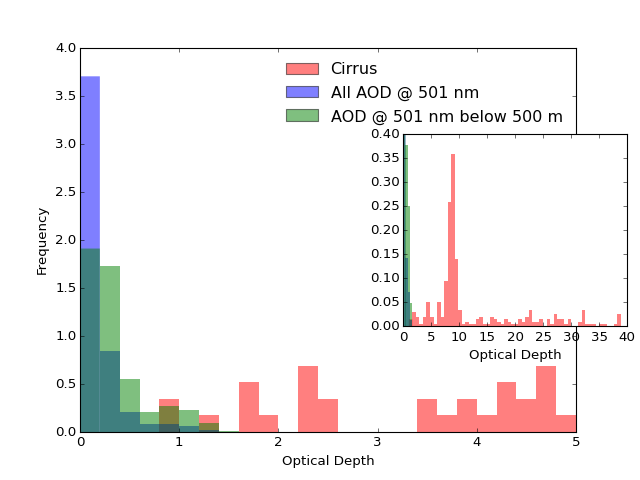

In [302]:
fig=plt.figure()
plt.hist(cr['tau_fl'],bins=25,range=[0,5.0],edgecolor='None',color='r',alpha=0.5,normed=True,label='Cirrus')
plt.hist(arc['AOD0501'][ar['fl']],bins=25,range=[0,5.0],normed=True,edgecolor='None',alpha=0.5,
         label='All AOD @ 501 nm')
plt.hist(arc['AOD0501'][ar['fl_0.5']],bins=25,range=[0,5.0],normed=True,edgecolor='None',alpha=0.5,
         label='AOD @ 501 nm below 500 m')

plt.legend(frameon=False)
plt.xlabel('Optical Depth')
plt.ylabel('Frequency')


left, bottom, width, height = [0.63, 0.32, 0.35, 0.4]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.hist(cr['tau_fl'],bins=60,edgecolor='None',color='r',alpha=0.5,normed=True,label='Cirrus')
ax2.hist(arc['AOD0501'][ar['fl']],bins=5,range=[0,2.0],normed=True,edgecolor='None',alpha=0.5,
         label='All AOD @ 501 nm')
ax2.hist(arc['AOD0501'][ar['fl_0.5']],bins=5,range=[0,2.0],normed=True,edgecolor='None',alpha=0.5,
         label='AOD @ 501 nm below 500 m')
ax2.set_ylim(0,0.4)
#plt.legend(frameon=False)
ax2.set_xlabel('Optical Depth')
#plt.ylabel('Frequency')
plt.savefig(fp+'zen_ict//v3//KORUS_AOD_COD.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


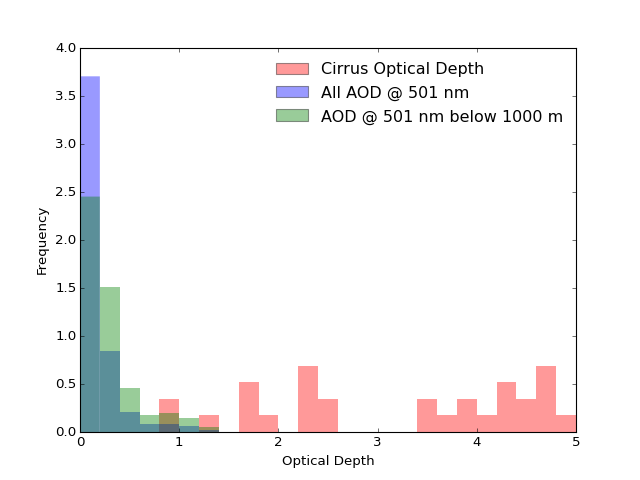

In [287]:
plt.figure()
plt.hist(cr['tau_fl'],bins=25,range=[0,5.0],edgecolor='None',color='r',alpha=0.4,normed=True,label='Cirrus Optical Depth')
plt.hist(arc['AOD0501'][ar['fl']],bins=25,range=[0,5.0],normed=True,edgecolor='None',alpha=0.4,
         label='All AOD @ 501 nm')
plt.hist(arc['AOD0501'][ar['fl_1.0']],bins=25,range=[0,5.0],normed=True,edgecolor='None',alpha=0.4,
         label='AOD @ 501 nm below 1000 m')
plt.legend(frameon=False)
plt.xlabel('Optical Depth')
plt.ylabel('Frequency')
#plt.ylim(0,0.4)


In [276]:
ar.keys()

[u'AOD1040',
 u'AOD0532',
 u'UNCAOD0452',
 u'UNCAOD0550',
 u'AOD1020',
 u'AOD1627',
 u'AOD0606',
 u'UNCAOD0620',
 u'AOD1559',
 u'AOD1064',
 u'AOD0620',
 u'Latitude',
 u'AOD0550',
 u'AOD0452',
 'fl_1_1.5',
 u'fl_alt1',
 u'fl1',
 u'UNCAOD1236',
 u'fl2',
 'fl_0.5_1',
 'fl_1.0',
 'fl_8',
 u'UNCAOD0501',
 u'UNCAOD0606',
 u'qual_flag',
 u'UNCAOD0675',
 u'AOD0520',
 u'UNCAOD1559',
 'fl_2_8',
 u'AOD0501',
 u'Longitude',
 'fl_1.5_2',
 'fl_0.5',
 u'UNCAOD0380',
 u'fl',
 u'AOD0675',
 u'fl_QA',
 u'AOD1236',
 u'AOD0380',
 u'UNCAOD0865',
 u'Start_UTC',
 u'UNCAOD0781',
 u'days',
 u'UNCAOD0520',
 u'AOD0781',
 u'UNCAOD1064',
 u'fl_alt',
 u'AOD0865',
 u'amass_aer',
 u'UNCAOD1627',
 u'UNCAOD1020',
 u'UNCAOD0532',
 u'UNCAOD1040',
 u'GPS_Alt']

<IPython.core.display.Javascript object>


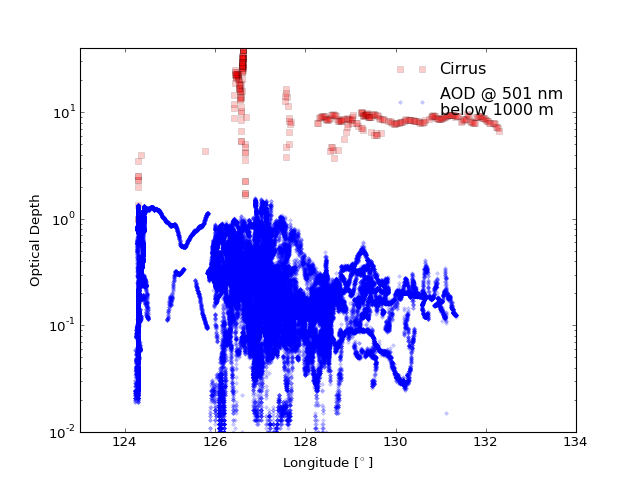

(0.01, 40)

In [280]:
plt.figure()
plt.plot(cr['lon_fl'],cr['tau_fl'],'sr',alpha=0.2,label='Cirrus')
plt.plot(ar['Longitude'][ar['fl_1.0']],arc['AOD0501'][ar['fl_1.0']],'.b',alpha=0.2,label='AOD @ 501 nm\nbelow 1000 m')
plt.yscale('log')
plt.xlabel('Longitude [$^\\circ$]')
plt.ylabel('Optical Depth')
plt.legend(frameon=False)
plt.xlim(123,134)
plt.ylim(0.01,40)

<IPython.core.display.Javascript object>


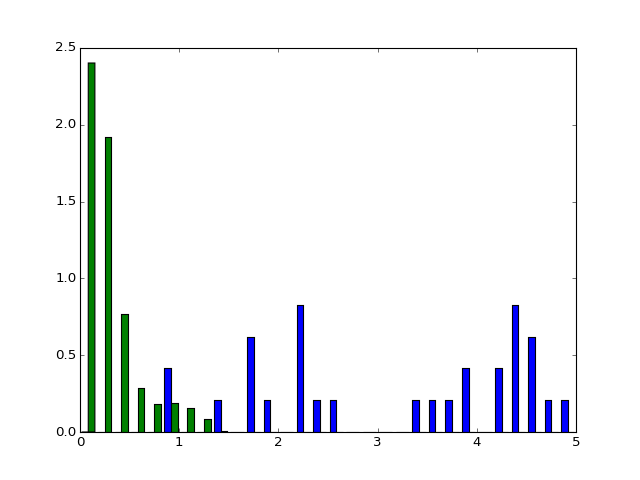

([array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.4137931 ,  0.        ,  0.        ,  0.20689655,  0.        ,
          0.62068966,  0.20689655,  0.        ,  0.82758621,  0.20689655,
          0.20689655,  0.        ,  0.        ,  0.        ,  0.        ,
          0.20689655,  0.20689655,  0.20689655,  0.4137931 ,  0.        ,
          0.4137931 ,  0.82758621,  0.62068966,  0.20689655,  0.20689655]),
  array([  2.40228714e+00,   1.92312047e+00,   7.68399004e-01,
           2.87986866e-01,   1.82574728e-01,   1.88971920e-01,
           1.54325181e-01,   8.18048007e-02,   9.62409420e-03,
           9.05797101e-04,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.0

In [285]:
plt.figure()
plt.hist([cr['tau_fl'],arc['AOD0501'][ar['fl_1.0']]],bins=30,range=[0,5],label=['Cirrus','AOD @ 501 nm'],normed=True)
